In [ ]:
!pip install python-magic



In [ ]:
import magic

file_path = "/content/archive.zip"
file_type = magic.from_file(file_path, mime=True)
print("File Type:", file_type)


File Type: application/zip


In [ ]:
#as the csv file is 2.3 gb so extracted in google colab itself
import zipfile
import os
import pandas as pd

# File paths
zip_file_path = "/content/archive.zip"  # Path to your ZIP file
extract_path = "/content/extracted_data"  # Directory to extract files

# Extract the ZIP file
try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"Files extracted to: {extract_path}")
except zipfile.BadZipFile:
    print("Error: The file is not a valid ZIP archive.")

# Locate the CSV file
csv_file_path = None
for root, dirs, files in os.walk(extract_path):
    for file in files:
        if file.endswith(".csv"):
            csv_file_path = os.path.join(root, file)
            break

if not csv_file_path:
    raise FileNotFoundError("No CSV file found in the provided ZIP.")



Files extracted to: /content/extracted_data


In [ ]:
import pandas as pd

file_path = "/content/extracted_data/US_Accidents_March23.csv"  # Replace with your file path

# Load the file in chunks
chunk_size = 1000  # Adjust chunk size as needed
chunk_iter = pd.read_csv(file_path, chunksize=chunk_size)

# Process the first chunk to inspect data
for chunk in chunk_iter:
    print(chunk.head())  # Display the first few rows of the first chunk
    break  # Stop after the first chunk



    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

In [ ]:
import pandas as pd

file_path = "/content/extracted_data/US_Accidents_March23.csv"  # Replace with your file path

# Load and inspect the first chunk
chunk_size = 1000  # Adjust chunk size as needed
chunk_iter = pd.read_csv(file_path, chunksize=chunk_size)

# Extract the first chunk
first_chunk = next(chunk_iter)
print(first_chunk.head())  # Display the first 5 rows



    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

In [ ]:
# Example: Get basic statistics from the first chunk
print(first_chunk.describe())

# Example: Filter rows where Severity is 4
severity_4 = first_chunk[first_chunk['Severity'] == 10000]
print(severity_4.head())



NameError: name 'first_chunk' is not defined

In [ ]:
import dask.dataframe as dd

ddf = dd.read_csv(file_path)
print(ddf.head())


    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

In [ ]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 4.6 MB/s eta 0:00:00


In [ ]:
import dask.dataframe as dd

ddf = dd.read_csv(file_path)
print(ddf.head())


    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

In [ ]:
# Check for missing values
missing_values = first_chunk.isnull().sum()
missing_percentage = (missing_values / len(first_chunk)) * 100

# Display columns with missing data
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data.sort_values(by='Percentage', ascending=False))


                       Missing Values  Percentage
End_Lat                          1000       100.0
End_Lng                          1000       100.0
Precipitation(in)                 813        81.3
Wind_Chill(F)                     540        54.0
Wind_Speed(mph)                    47         4.7
Visibility(mi)                      3         0.3
Weather_Condition                   2         0.2
Wind_Direction                      1         0.1
Humidity(%)                         1         0.1
Temperature(F)                      1         0.1
Weather_Timestamp                   1         0.1
Pressure(in)                        1         0.1
Roundabout                          0         0.0
Railway                             0         0.0
Station                             0         0.0
Junction                            0         0.0
Give_Way                            0         0.0
Crossing                            0         0.0
Bump                                0         0.0


In [ ]:
# Drop columns with more than 50% missing values
columns_to_drop = missing_data[missing_data['Percentage'] > 50].index
cleaned_chunk = first_chunk.drop(columns=columns_to_drop, axis=1)

# Impute missing numerical values with the median
numerical_columns = cleaned_chunk.select_dtypes(include=['float64', 'int64']).columns
cleaned_chunk[numerical_columns] = cleaned_chunk[numerical_columns].fillna(cleaned_chunk[numerical_columns].median())

# Impute missing categorical values with the mode
categorical_columns = cleaned_chunk.select_dtypes(include=['object']).columns
cleaned_chunk[categorical_columns] = cleaned_chunk[categorical_columns].fillna(cleaned_chunk[categorical_columns].mode().iloc[0])

print(cleaned_chunk.head())


    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  Distance(mi)  \
0  39.865147 -84.058723          0.01   
1  39.928059 -82.831184          0.01   
2  39.063148 -84.032608          0.01   
3  39.747753 -84.205582          0.01   
4  39.627781 -84.188354          0.01   

                                         Description  \
0  Right lane blocked due to accident on I-70 Eas...   
1  Accident on Brice Rd at Tussing Rd. Expect del...   
2  Accident on OH-32 State Route 32 Westbound at ...   
3  Accident on I-75 Southbound at Exits 52 52B US...   
4  Accident on McEwen Rd at OH-725 Miamisburg 

In [ ]:
# Convert time columns to datetime
cleaned_chunk['Start_Time'] = pd.to_datetime(cleaned_chunk['Start_Time'])
cleaned_chunk['End_Time'] = pd.to_datetime(cleaned_chunk['End_Time'])

# Extract useful time-based features
cleaned_chunk['Year'] = cleaned_chunk['Start_Time'].dt.year
cleaned_chunk['Month'] = cleaned_chunk['Start_Time'].dt.month
cleaned_chunk['Day'] = cleaned_chunk['Start_Time'].dt.day
cleaned_chunk['Hour'] = cleaned_chunk['Start_Time'].dt.hour

print(cleaned_chunk[['Start_Time', 'Year', 'Month', 'Day', 'Hour']].head())


           Start_Time  Year  Month  Day  Hour
0 2016-02-08 05:46:00  2016      2    8     5
1 2016-02-08 06:07:59  2016      2    8     6
2 2016-02-08 06:49:27  2016      2    8     6
3 2016-02-08 07:23:34  2016      2    8     7
4 2016-02-08 07:39:07  2016      2    8     7


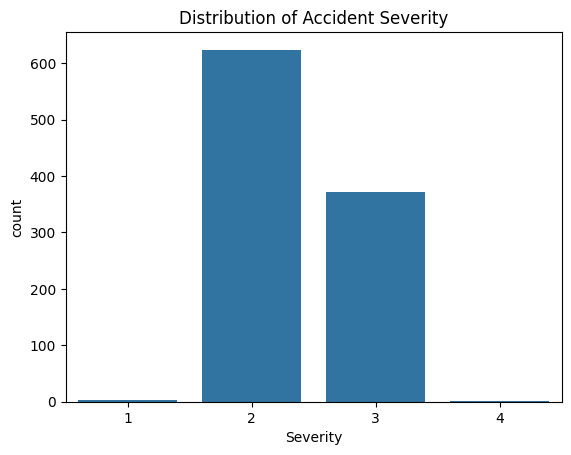

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the severity distribution
sns.countplot(x='Severity', data=cleaned_chunk)
plt.title('Distribution of Accident Severity')
plt.show()


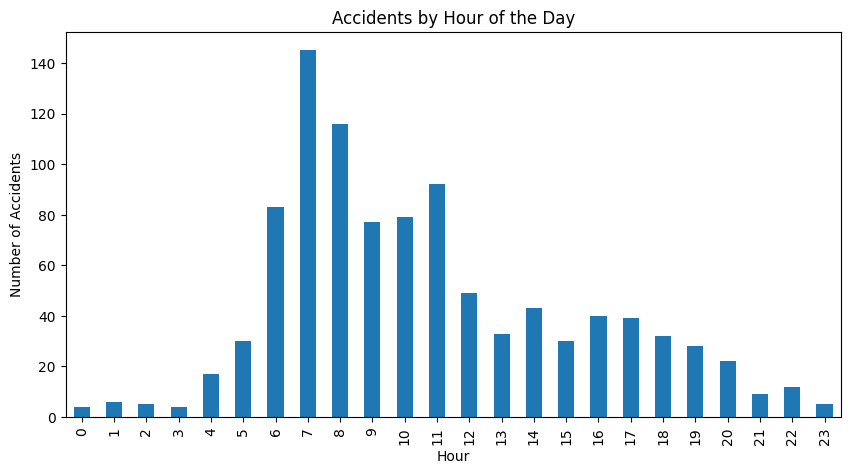

In [ ]:
# Accidents by hour
hourly_accidents = cleaned_chunk.groupby('Hour').size()
hourly_accidents.plot(kind='bar', figsize=(10, 5))
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()


In [ ]:
cleaned_chunk.to_csv('/content/cleaned_chunk.csv', index=False)
print("Cleaned chunk saved successfully!")


Cleaned chunk saved successfully!


In [ ]:
file_path = '/content/cleaned_chunk.csv'
US_Accidents = pd.read_csv(file_path)
US_Accidents.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Day,Hour
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,False,False,Night,Night,Night,Night,2016,2,8,5
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,False,False,Night,Night,Night,Day,2016,2,8,6
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,True,False,Night,Night,Day,Day,2016,2,8,6
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,False,False,Night,Day,Day,Day,2016,2,8,7
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,True,False,Day,Day,Day,Day,2016,2,8,7


In [ ]:
US_Accidents.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Year',
       'Month', 'Day', 'Hour'],
      dtype='object')

In [ ]:
US_Accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1000 non-null   object 
 1   Source                 1000 non-null   object 
 2   Severity               1000 non-null   int64  
 3   Start_Time             1000 non-null   object 
 4   End_Time               1000 non-null   object 
 5   Start_Lat              1000 non-null   float64
 6   Start_Lng              1000 non-null   float64
 7   Distance(mi)           1000 non-null   float64
 8   Description            1000 non-null   object 
 9   Street                 1000 non-null   object 
 10  City                   1000 non-null   object 
 11  County                 1000 non-null   object 
 12  State                  1000 non-null   object 
 13  Zipcode                1000 non-null   object 
 14  Country                1000 non-null   object 
 15  Timez

In [ ]:
print(US_Accidents.describe())

          Severity    Start_Lat    Start_Lng  Distance(mi)  Temperature(F)  \
count  1000.000000  1000.000000  1000.000000   1000.000000     1000.000000   
mean      2.371000    39.421341   -93.953647      0.034350       48.932000   
std       0.491529     1.015623    17.071844      0.287393       21.347392   
min       1.000000    36.609657  -123.354477      0.000000        3.900000   
25%       2.000000    38.720144  -121.225897      0.000000       32.000000   
50%       2.000000    39.758961   -84.184639      0.010000       46.900000   
75%       3.000000    39.953082   -83.032806      0.010000       64.000000   
max       4.000000    41.428753   -81.550728      7.070000       99.000000   

       Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)    Year  \
count  1000.000000   1000.000000     1000.000000      1000.000000  1000.0   
mean     66.674000     29.976940        7.983500         9.811300  2016.0   
std      24.624827      0.238915        3.318287         4.697586 

In [ ]:
!pip install missingno

<Axes: >

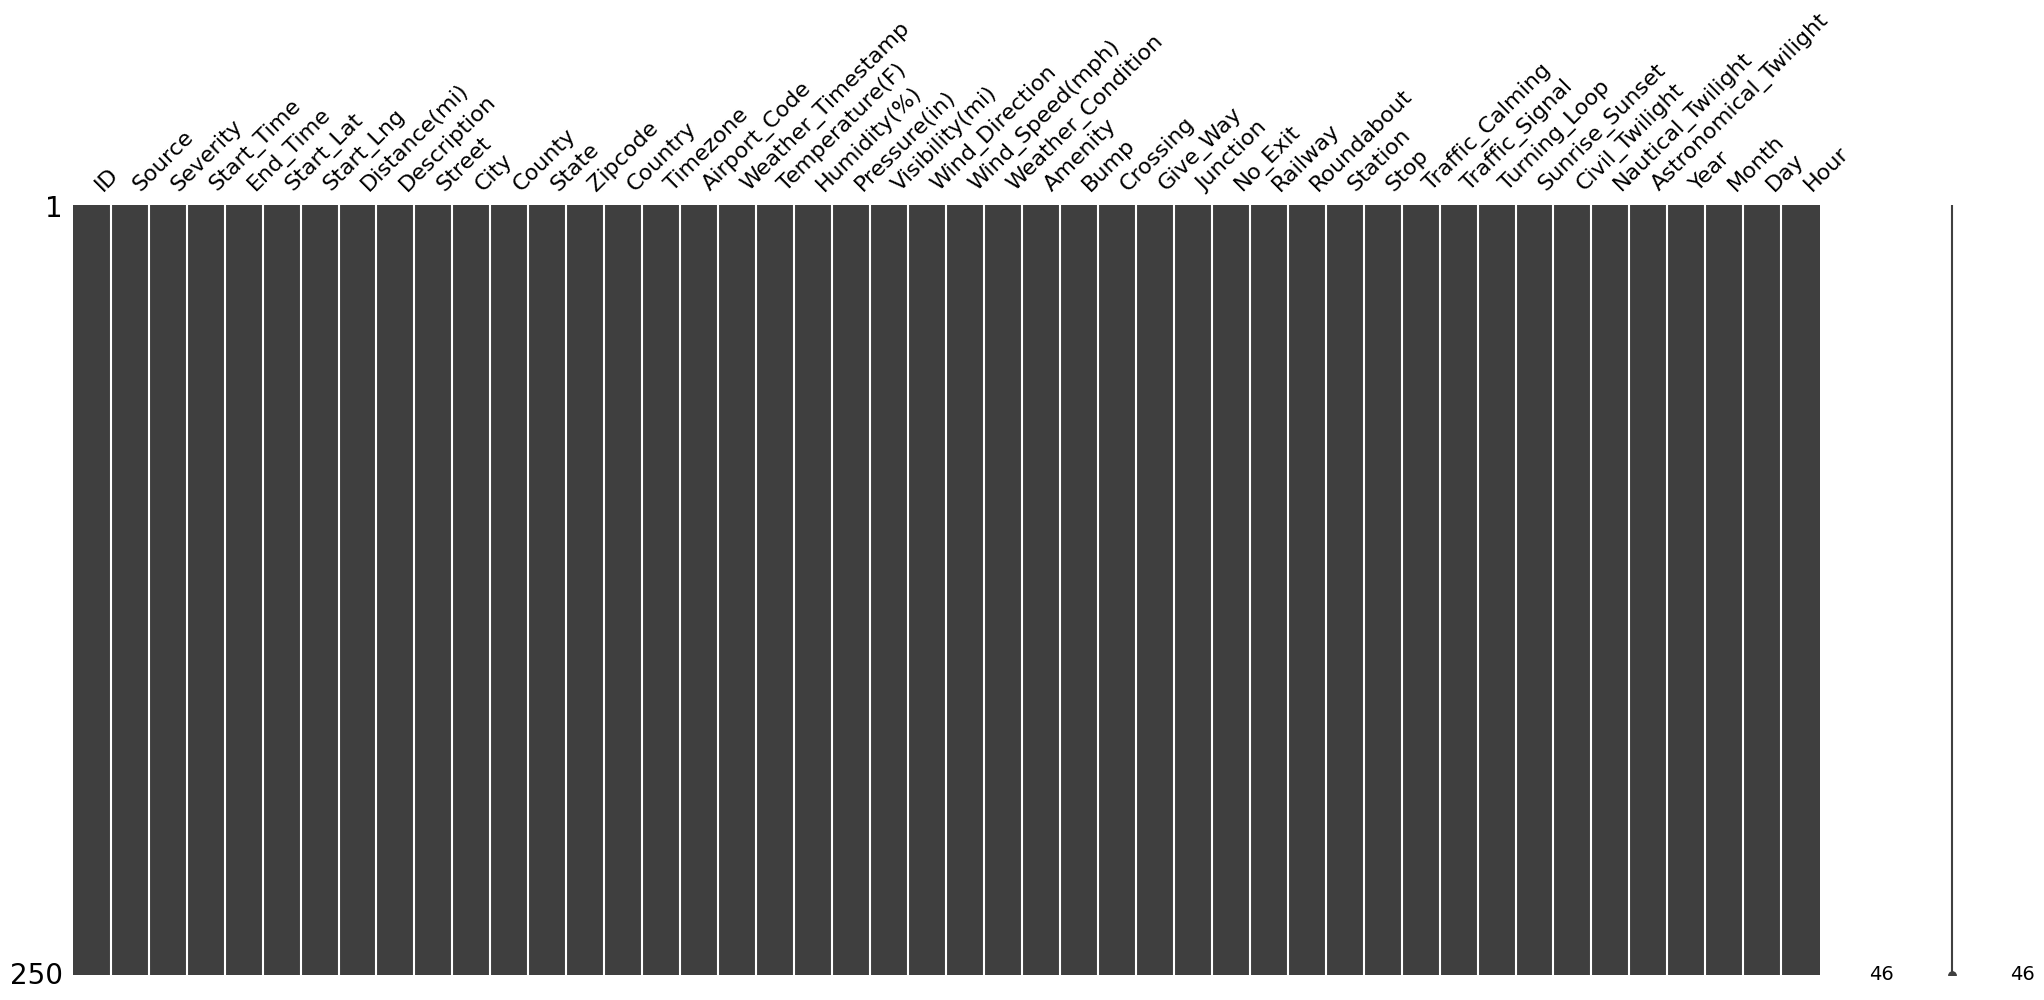

In [ ]:
#Visualising Missing Values
import missingno as msno
msno.matrix(US_Accidents.sample(250))

In [ ]:
# see what columns have missing data
US_Accidents.isnull().sum().sort_values(ascending=False)

,0
ID,0
Stop,0
Amenity,0
Bump,0
Crossing,0
Give_Way,0
Junction,0
No_Exit,0
Railway,0
Roundabout,0


In [ ]:
#eda
# Get the top 20 cities with the most accidents
accidents_by_city = US_Accidents['City'].value_counts()

top_20_cities = accidents_by_city.head(20)
print("Top 20 Cities with the Most Accidents:")
print(top_20_cities)

Top 20 Cities with the Most Accidents:
City
Dayton           321
Columbus         170
Sacramento        32
San Jose          21
Miamisburg        16
Cleveland         16
Akron             15
Westerville       13
Oakland           12
Dublin            12
San Francisco     12
Batavia            8
Grove City         7
Bowling Green      7
Pickerington       7
Barberton          7
Pleasanton         7
Roseville          6
Davis              6
Independence       6
Name: count, dtype: int64


In [ ]:
# Verify available columns
print("Available columns in the dataset:")
print(cleaned_chunk.columns)

# Select features for the model
selected_features = [
    'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)',
    'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
    'Precipitation(in)', 'Weather_Condition', 'Hour', 'Month', 'Day'
]

# Target variable
target = 'Severity'

# Dynamically filter selected features to include only those present in the dataset
selected_features = [feature for feature in selected_features if feature in cleaned_chunk.columns]

if target not in cleaned_chunk.columns:
    raise KeyError(f"Target column '{target}' not found in dataset.")

# Ensure no null values exist in selected features or target
final_data = cleaned_chunk[selected_features + [target]].dropna()

# One-hot encode categorical features
if 'Weather_Condition' in final_data.columns:
    final_data = pd.get_dummies(final_data, columns=['Weather_Condition'], drop_first=True)

# Separate features and target
X = final_data.drop(columns=[target])
y = final_data[target]

print("Features and target prepared successfully!")



Available columns in the dataset:
Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Year',
       'Month', 'Day', 'Hour'],
      dtype='object')
Features and target prepared successfully!


In [ ]:
# Get the top 20 cities with the most accidents
accidents_by_city = US_Accidents['City'].value_counts()

top_20_cities = accidents_by_city.head(20)
print("Top 20 Cities with the Most Accidents:")
print(top_20_cities)

Top 20 Cities with the Most Accidents:
City
Dayton           321
Columbus         170
Sacramento        32
San Jose          21
Miamisburg        16
Cleveland         16
Akron             15
Westerville       13
Oakland           12
Dublin            12
San Francisco     12
Batavia            8
Grove City         7
Bowling Green      7
Pickerington       7
Barberton          7
Pleasanton         7
Roseville          6
Davis              6
Independence       6
Name: count, dtype: int64


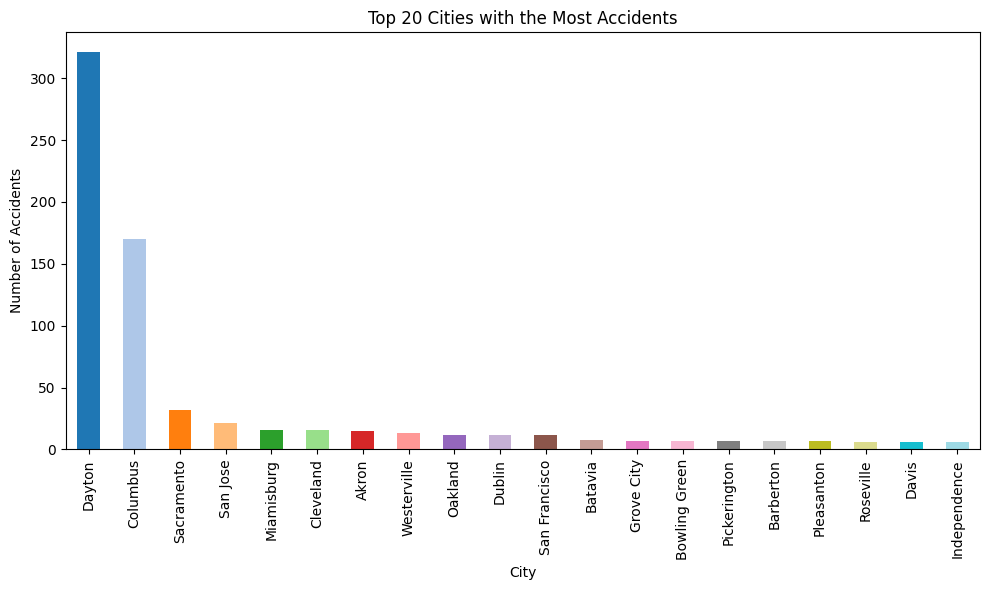

In [ ]:
# Create the bar plot
plt.figure(figsize=(10, 6))
color_range = range(50)
top_20_cities.plot(kind='bar', color=plt.get_cmap('tab20')(range(len(color_range))))

plt.title('Top 20 Cities with the Most Accidents')
plt.xlabel('City')
plt.ylabel('Number of Accidents')

# Show the bar plot
plt.tight_layout()
plt.show()

In [ ]:
# split train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=60616)

In [ ]:
# load libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import pickle
from sklearn.pipeline import Pipeline
import seaborn as sns

In [ ]:
map_quest = pd.read_csv("/content/cleaned_chunk.csv")



In [ ]:
print(map_quest.columns)


Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Year',
       'Month', 'Day', 'Hour'],
      dtype='object')


In [ ]:
# split X, y
X = map_quest.drop('Severity', axis=1)
y= map_quest['Severity']

In [ ]:
print(X.shape)


(1000, 45)


In [ ]:
print(X.head())


    ID   Source           Start_Time             End_Time  Start_Lat  \
0  A-1  Source2  2016-02-08 05:46:00  2016-02-08 11:00:00  39.865147   
1  A-2  Source2  2016-02-08 06:07:59  2016-02-08 06:37:59  39.928059   
2  A-3  Source2  2016-02-08 06:49:27  2016-02-08 07:19:27  39.063148   
3  A-4  Source2  2016-02-08 07:23:34  2016-02-08 07:53:34  39.747753   
4  A-5  Source2  2016-02-08 07:39:07  2016-02-08 08:09:07  39.627781   

   Start_Lng  Distance(mi)                                        Description  \
0 -84.058723          0.01  Right lane blocked due to accident on I-70 Eas...   
1 -82.831184          0.01  Accident on Brice Rd at Tussing Rd. Expect del...   
2 -84.032608          0.01  Accident on OH-32 State Route 32 Westbound at ...   
3 -84.205582          0.01  Accident on I-75 Southbound at Exits 52 52B US...   
4 -84.188354          0.01  Accident on McEwen Rd at OH-725 Miamisburg Cen...   

                      Street          City  ... Traffic_Signal Turning_Loop  \
0

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=60616)

In [ ]:
# Apply Label Encoding or One-Hot Encoding to X_test to ensure consistency

# For Label Encoding (if you used LabelEncoder for ordinal variables)
for column in X_train.select_dtypes(include=['object']).columns:
    # Fit and transform X_train, transform X_test
    label_encoder = LabelEncoder()
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])

# For One-Hot Encoding (if you used get_dummies for nominal variables)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure that both X_train and X_test have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Now train and predict again
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
fbeta_train = fbeta_score(y_train, y_pred_train, beta=0.5, average='weighted')
print("Train F_Beta: ", fbeta_train)

y_pred_test = clf.predict(X_test)
fbeta_test = fbeta_score(y_test, y_pred_test, beta=0.5, average='weighted')
print("Test F_Beta: ", fbeta_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Train F_Beta:  0.760015391175033
Test F_Beta:  0.5577463387456224


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# One-Hot Encoding for categorical columns
X_train = pd.get_dummies(X_train, drop_first=True)

# Fit the logistic regression model again
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
fbeta_train = fbeta_score(y_train, y_pred_train, beta=0.5, average='weighted')
print("Train F_Beta: ", fbeta_train)

y_pred_test = clf.predict(X_test)
fbeta_test = fbeta_score(y_test, y_pred_test, beta=0.5, average='weighted')
print("Test F_Beta: ", fbeta_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Train F_Beta:  0.760015391175033
Test F_Beta:  0.5577463387456224


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
clf = LogisticRegression(penalty=None, C=0.01, max_iter=100000, random_state=60616)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
fbeta_train = fbeta_score(y_train, y_pred_train, beta=0.5, average='weighted')
print("Train F_Beta: ", fbeta_train)

y_pred_test = clf.predict(X_test)
fbeta_test = fbeta_score(y_test, y_pred_test, beta=0.5, average='weighted')
print("Test F_Beta: ", fbeta_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Train F_Beta:  0.760015391175033
Test F_Beta:  0.5577463387456224


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
clf = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=2, max_features='sqrt',random_state=60616)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
fbeta_train = fbeta_score(y_train, y_pred_train, beta=0.5, average='weighted')
print("Train F_Beta: ", (fbeta_train))
y_pred_test = clf.predict(X_test)
fbeta_test = fbeta_score(y_test, y_pred_test, beta=0.5, average='weighted')
print("Test F_Beta: ", (fbeta_test))

Train F_Beta:  0.9533613472122794
Test F_Beta:  0.5485696536335514


In [ ]:
clf = RandomForestClassifier(n_estimators=160, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', random_state=60616)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
fbeta_train = fbeta_score(y_train, y_pred_train, beta=0.5, average='weighted')
print("Train F_Beta: ", fbeta_train)

y_pred_test = clf.predict(X_test)
fbeta_test = fbeta_score(y_test, y_pred_test, beta=0.5, average='weighted')
print("Test F_Beta: ", fbeta_test)


Train F_Beta:  0.9880263497804185
Test F_Beta:  0.5178657286405828


In [ ]:
clf = AdaBoostClassifier(n_estimators=60, algorithm='SAMME', random_state=60616)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
fbeta_train = fbeta_score(y_train, y_pred_train, beta=0.5, average='weighted')
print("Train F_Beta: ", fbeta_train)

y_pred_test = clf.predict(X_test)
fbeta_test = fbeta_score(y_test, y_pred_test, beta=0.5, average='weighted')
print("Test F_Beta: ", fbeta_test)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Train F_Beta:  0.9066602391436945
Test F_Beta:  0.4946484361409734


In [ ]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

print(f"Training data: {X_train.shape}")
print(f"Validation data: {X_val.shape}")
print(f"Test data: {X_test.shape}")


Training data: (750, 29)
Validation data: (150, 29)
Test data: (100, 29)


In [ ]:
!pip install xgboost


In [ ]:
import numpy as np

print("Minimum label in y_train:", y_train.min())
print("Maximum label in y_train:", y_train.max())
print("Labels in y_train:", np.unique(y_train))  # Use np.unique() for NumPy arrays




Minimum label in y_train: 0
Maximum label in y_train: 3
Labels in y_train: [0 1 2 3]


In [ ]:
import numpy as np

# Check the unique labels after adjustment
print("Labels after adjustment:")
print("y_train:", np.unique(y_train))  # Use np.unique() for NumPy arrays
print("y_val:", np.unique(y_val))    # Use np.unique() for NumPy arrays
print("y_test:", np.unique(y_test))  # Use np.unique() for NumPy arrays



Labels after adjustment:
y_train: [0 1 2 3]
y_val: [1 2]
y_test: [1 2]


In [ ]:
params['num_class'] = len(np.unique(y_train))  # Ensure num_class matches the number of unique labels



In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)


In [ ]:
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=evals,
    early_stopping_rounds=early_stopping_rounds,
    verbose_eval=True
)



XGBoostError: [06:59:32] /workspace/src/metric/multiclass_metric.cu:34: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=4 but found 4 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x22dcbc) [0x7c5e3a42dcbc]
  [bt] (1) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0xb3e91e) [0x7c5e3ad3e91e]
  [bt] (2) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x5f1b02) [0x7c5e3a7f1b02]
  [bt] (3) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x5cef82) [0x7c5e3a7cef82]
  [bt] (4) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(XGBoosterEvalOneIter+0x15e) [0x7c5e3a33a38e]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7c5ec523de2e]
  [bt] (6) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7c5ec523a493]
  [bt] (7) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0xa3e9) [0x7c5ec52633e9]
  [bt] (8) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0x9a00) [0x7c5ec5262a00]



XGBoostError: [06:53:46] /workspace/src/objective/multiclass_obj.cu:111: SoftmaxMultiClassObj: label must be in [0, num_class).
Stack trace:
  [bt] (0) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x22dcbc) [0x7c5e3a42dcbc]
  [bt] (1) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0xc02147) [0x7c5e3ae02147]
  [bt] (2) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x5cb173) [0x7c5e3a7cb173]
  [bt] (3) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x6f) [0x7c5e3a33752f]
  [bt] (4) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7c5ec523de2e]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7c5ec523a493]
  [bt] (6) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0xa3e9) [0x7c5ec52633e9]
  [bt] (7) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0x9a00) [0x7c5ec5262a00]
  [bt] (8) /usr/bin/python3(_PyObject_MakeTpCall+0x25b) [0x5c0de1845b4b]



In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Convert data into DMatrix format (optimized for XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define hyperparameters
params = {
    'objective': 'multi:softmax',  # Use softmax for multi-class classification
    'num_class': len(y.unique()),  # Number of classes
    'max_depth': 6,                # Maximum tree depth
    'eta': 0.3,                    # Learning rate
    'eval_metric': 'mlogloss',     # Evaluation metric
    'seed': 42                     # Random seed
}

# Train the model
evals = [(dtrain, 'train'), (dval, 'validation')]
num_boost_round = 100  # Maximum number of boosting rounds
early_stopping_rounds = 10  # Early stopping if validation loss doesn't improve

xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=evals,
    early_stopping_rounds=early_stopping_rounds,
    verbose_eval=True
)

# Make predictions on the test set
y_pred = xgb_model.predict(dtest)
y_pred = y_pred.astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


XGBoostError: [06:51:45] /workspace/src/objective/multiclass_obj.cu:111: SoftmaxMultiClassObj: label must be in [0, num_class).
Stack trace:
  [bt] (0) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x22dcbc) [0x7c5e3a42dcbc]
  [bt] (1) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0xc02147) [0x7c5e3ae02147]
  [bt] (2) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x5cb173) [0x7c5e3a7cb173]
  [bt] (3) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x6f) [0x7c5e3a33752f]
  [bt] (4) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7c5ec523de2e]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7c5ec523a493]
  [bt] (6) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0xa3e9) [0x7c5ec52633e9]
  [bt] (7) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0x9a00) [0x7c5ec5262a00]
  [bt] (8) /usr/bin/python3(_PyObject_MakeTpCall+0x25b) [0x5c0de1845b4b]



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions and evaluation
rf_pred = rf_model.predict(X_val)
rf_accuracy = accuracy_score(y_val, rf_pred)
print(f"Random Forest Validation Accuracy: {rf_accuracy:.4f}")
print(classification_report(y_val, rf_pred))


Random Forest Validation Accuracy: 0.6933
              precision    recall  f1-score   support

           2       0.73      0.78      0.76        92
           3       0.62      0.55      0.58        58

    accuracy                           0.69       150
   macro avg       0.68      0.67      0.67       150
weighted avg       0.69      0.69      0.69       150



In [ ]:
file_path = '/content/cleaned_chunk.csv'
US_Accidents = pd.read_csv(file_path)
US_Accidents.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Day,Hour
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,False,False,Night,Night,Night,Night,2016,2,8,5
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,False,False,Night,Night,Night,Day,2016,2,8,6
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,True,False,Night,Night,Day,Day,2016,2,8,6
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,False,False,Night,Day,Day,Day,2016,2,8,7
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,True,False,Day,Day,Day,Day,2016,2,8,7


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predictions and evaluation
gb_pred = gb_model.predict(X_val)
gb_accuracy = accuracy_score(y_val, gb_pred)
print(f"Gradient Boosting Validation Accuracy: {gb_accuracy:.4f}")
print(classification_report(y_val, gb_pred))


Gradient Boosting Validation Accuracy: 0.7333
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.77      0.83      0.80        92
           3       0.68      0.59      0.63        58

    accuracy                           0.73       150
   macro avg       0.48      0.47      0.48       150
weighted avg       0.73      0.73      0.73       150



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Adjust target labels to start from 0
y_train_adjusted = y_train - 1
y_val_adjusted = y_val - 1
y_test_adjusted = y_test - 1

# Train the XGBoost model with adjusted labels
xgb_model = xgb.XGBClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8
)

# Train the model
xgb_model.fit(X_train, y_train_adjusted)

# Evaluate on validation data
val_pred = xgb_model.predict(X_val)
val_accuracy = accuracy_score(y_val_adjusted, val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Classification report for validation set
print("Validation Classification Report:")
print(classification_report(y_val_adjusted, val_pred))

# Evaluate on test data
test_pred = xgb_model.predict(X_test)
test_accuracy = accuracy_score(y_test_adjusted, test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Classification report for test set
print("Test Classification Report:")
print(classification_report(y_test_adjusted, test_pred))


Validation Accuracy: 0.7667
Validation Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.85      0.82        92
           2       0.73      0.64      0.68        58

    accuracy                           0.77       150
   macro avg       0.76      0.74      0.75       150
weighted avg       0.76      0.77      0.76       150

Test Accuracy: 0.8200
Test Classification Report:
              precision    recall  f1-score   support

           1       0.84      0.86      0.85        59
           2       0.79      0.76      0.78        41

    accuracy                           0.82       100
   macro avg       0.82      0.81      0.81       100
weighted avg       0.82      0.82      0.82       100



In [ ]:
val_pred = xgb_model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Classification report for validation set
print("Validation Classification Report:")
print(classification_report(y_val, val_pred))


Validation Accuracy: 0.0933
Validation Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.27      0.15      0.20        92
           3       0.00      0.00      0.00        58

    accuracy                           0.09       150
   macro avg       0.09      0.05      0.07       150
weighted avg       0.17      0.09      0.12       150



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
test_pred = xgb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Classification report for test set
print("Test Classification Report:")
print(classification_report(y_test, test_pred))


Test Accuracy: 0.0800
Test Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.21      0.14      0.16        59
           3       0.00      0.00      0.00        41

    accuracy                           0.08       100
   macro avg       0.07      0.05      0.05       100
weighted avg       0.12      0.08      0.10       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
test_pred = xgb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Classification report for test set
print("Test Classification Report:")
print(classification_report(y_test, test_pred))


Test Accuracy: 0.0800
Test Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.21      0.14      0.16        59
           3       0.00      0.00      0.00        41

    accuracy                           0.08       100
   macro avg       0.07      0.05      0.05       100
weighted avg       0.12      0.08      0.10       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

<Figure size 1000x800 with 0 Axes>

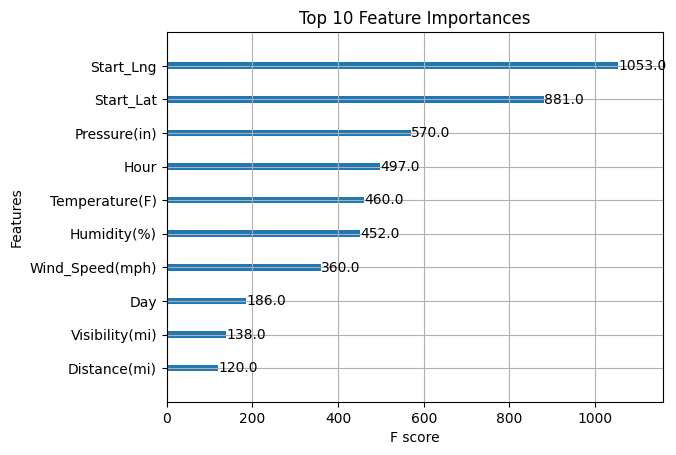

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, max_num_features=10)
plt.title('Top 10 Feature Importances')
plt.show()


In [ ]:
# Reduce the search space to test fewer values
rf_param_grid = {
    'n_estimators': [50, 100],  # Reduced number of estimators
    'max_depth': [10, 20],  # Reduced max depth options
    'min_samples_split': [2],  # Only try the default value
    'min_samples_leaf': [1]  # Only try the default value
}



In [ ]:
# Use only a subset of the training data
X_train_sub = X_train.sample(frac=0.1, random_state=42)  # Take 10% of the training data
y_train_sub = y_train.sample(frac=0.1, random_state=42)  # Corresponding target values

# Train GridSearchCV on the smaller subset
rf_grid_search.fit(X_train_sub, y_train_sub)


Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define a parameter distribution for RandomizedSearchCV
rf_param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [10, 20, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

# Initialize RandomizedSearchCV
rf_random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=rf_param_dist, n_iter=10, cv=3, n_jobs=-1, verbose=2)

# Train the model with RandomizedSearchCV
rf_random_search.fit(X_train, y_train)

# Best parameters and accuracy
print(f"Best parameters for Random Forest: {rf_random_search.best_params_}")
rf_best_model = rf_random_search.best_estimator_

# Evaluate on validation set
rf_best_pred = rf_best_model.predict(X_val)
rf_best_accuracy = accuracy_score(y_val, rf_best_pred)
print(f"Optimized Random Forest Validation Accuracy: {rf_best_accuracy:.4f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 143}
Optimized Random Forest Validation Accuracy: 0.7267


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
lr_model.fit(X_train, y_train)

# Predictions and evaluation
lr_pred = lr_model.predict(X_val)
lr_accuracy = accuracy_score(y_val, lr_pred)
print(f"Logistic Regression Validation Accuracy: {lr_accuracy:.4f}")
print(classification_report(y_val, lr_pred))


Logistic Regression Validation Accuracy: 0.6467
              precision    recall  f1-score   support

           2       0.66      0.89      0.76        92
           3       0.60      0.26      0.36        58

    accuracy                           0.65       150
   macro avg       0.63      0.57      0.56       150
weighted avg       0.63      0.65      0.60       150



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [ ]:
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')


In [ ]:
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


In [ ]:
# Test the model
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Test Accuracy: 0.79

Confusion Matrix:
 [[50  9]
 [12 29]]


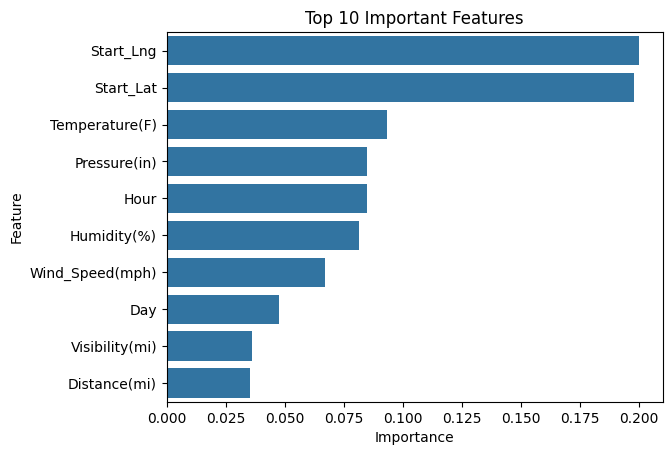

In [ ]:
# Feature importance
importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Important Features')
plt.show()
